In [1]:
library(zellkonverter)
library(SingleCellExperiment)
library(dreamlet)

options(repr.plot.width = 20, repr.plot.height = 16, repr.plot.res = 100)

Registered S3 methods overwritten by 'zellkonverter':
  method                                             from      
  py_to_r.numpy.ndarray                              reticulate
  py_to_r.pandas.core.arrays.categorical.Categorical reticulate

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,


# Preprocess

In [2]:
# Create SingleCellExperiment object that points to on-disk H5AD file, R reader as more than 2**31 elements.
sce <- readH5AD('preprocessed_de_immuneaging4_small.h5ad', use_hdf5=TRUE, verbose = TRUE)
sce

ℹ Using the Python reader

ℹ Using anndata version 0.8.0

⠙ Reading './preprocessed_de_immuneaging4_small.h5ad '
✔ obsm$protein_expression converted [7.9s]


ℹ Converting obsm
ℹ Converting obsm$protein_expression_Ctrl
✔ obsm$protein_expression_Ctrl converted [2.1s]


ℹ Converting obsm
ℹ Converting obsm$qc_obs
✔ obsm$qc_obs converted [2.2s]


ℹ Converting obsm
ℹ Converting obsm$removed_genes
✔ obsm$removed_genes converted [2.2s]


ℹ Converting obsm
ℹ Converting obsm$removed_proteins
✔ obsm$removed_proteins converted [1.8s]


ℹ Converting obsm
ℹ Converting obsm$versions
✔ obsm$versions converted [1.9s]


ℹ Converting obsm

! The names of these selected obsm items have been modified to match R conventions: 'X_scvi_integrated_batch_key_donor_id+tissue' -> 'X_scvi_integrated_batch_key_donor_id.tissue' and
'X_umap_scvi_integrated_batch_key_donor_id+tissue' -> 'X_umap_scvi_integrated_batch_key_donor_id.tissue'

ℹ Converting obsm
Warning message:
“The names of these selected obsm items have be

class: SingleCellExperiment 
dim: 14798 1241353 
metadata(0):
assays(1): X
rownames(14798): A1BG A3GALT2 ... ZYX ZZEF1
rowData names(11): gene_ids feature_types ... gene_names n_counts
colnames(1241353): CGAATGTCAATAAGCA-1_CZINY-0536-14
  TTGGCAATCTAACTGG-1_CZINY-0341-4 ... ACGTCAAAGACTCGGA-1_CZINY-0527-6
  TAGTGGTGTCAGGACA-1_CZINY-0169-7
colData names(39): n_genes n_genes_by_counts ... age_int age_group
reducedDimNames(22): BCR_IR TCR_IR ... removed_proteins versions
mainExpName: NULL
altExpNames(0):

In [3]:
sce

class: SingleCellExperiment 
dim: 14798 1241353 
metadata(0):
assays(1): X
rownames(14798): A1BG A3GALT2 ... ZYX ZZEF1
rowData names(11): gene_ids feature_types ... gene_names n_counts
colnames(1241353): CGAATGTCAATAAGCA-1_CZINY-0536-14
  TTGGCAATCTAACTGG-1_CZINY-0341-4 ... ACGTCAAAGACTCGGA-1_CZINY-0527-6
  TAGTGGTGTCAGGACA-1_CZINY-0169-7
colData names(39): n_genes n_genes_by_counts ... age_int age_group
reducedDimNames(22): BCR_IR TCR_IR ... removed_proteins versions
mainExpName: NULL
altExpNames(0):

In [4]:
pb <- aggregateToPseudoBulk(
    sce,
    assay = "X",
    cluster_id = "mrvi_groups",
    sample_id = "donor_tissue",
    verbose = TRUE)
# one 'assay' per cell type
assayNames(pb)
rownames(pb) <- rowData(sce)$genes
saveRDS(pb, file='pseudobulk_immuneaging.rds')

Processing block [[1/1, 1/1471]] ... 
OK
Processing block [[1/1, 2/1471]] ... 
OK
Processing block [[1/1, 3/1471]] ... 
OK
Processing block [[1/1, 4/1471]] ... 
OK
Processing block [[1/1, 5/1471]] ... 
OK
Processing block [[1/1, 6/1471]] ... 
OK
Processing block [[1/1, 7/1471]] ... 
OK
Processing block [[1/1, 8/1471]] ... 
OK
Processing block [[1/1, 9/1471]] ... 
OK
Processing block [[1/1, 10/1471]] ... 
OK
Processing block [[1/1, 11/1471]] ... 
OK
Processing block [[1/1, 12/1471]] ... 
OK
Processing block [[1/1, 13/1471]] ... 
OK
Processing block [[1/1, 14/1471]] ... 
OK
Processing block [[1/1, 15/1471]] ... 
OK
Processing block [[1/1, 16/1471]] ... 
OK
Processing block [[1/1, 17/1471]] ... 
OK
Processing block [[1/1, 18/1471]] ... 
OK
Processing block [[1/1, 19/1471]] ... 
OK
Processing block [[1/1, 20/1471]] ... 
OK
Processing block [[1/1, 21/1471]] ... 
OK
Processing block [[1/1, 22/1471]] ... 
OK
Processing block [[1/1, 23/1471]] ... 
OK
Processing block [[1/1, 24/1471]] ... 
OK
P

[1] "B cell"     "CD4+ Tcell" "CD8+ Tcell" "Mast Cell"  "Myeloid"   
[6] "NK ILC"

In [5]:
library(BiocParallel)
multicoreParam <- MulticoreParam(workers = 8)
multicoreParam

class: MulticoreParam
  bpisup: FALSE; bpnworkers: 8; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: NA; bpprogressbar: FALSE
  bpexportglobals: TRUE; bpexportvariables: FALSE; bpforceGC: FALSE
  bpfallback: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

In [6]:
rownames(pb) <- rowData(pb)$gene_names

In [7]:
# Normalize and apply voom/voomWithDreamWeights
res.proc = processAssays( pb, ~ tissue + cmv + age_group + sex + chemistry + site + 0, min.cells=10, min.count=5, min.prop=0.1, BPPARAM=multicoreParam)

# the resulting object of class dreamletProcessedData stores
# normalized data and other information
res.proc

  B cell...
7.7 secs

  CD4+ Tcell...
12 secs

  CD8+ Tcell...
8.7 secs

  Mast Cell...
2.5 secs

  Myeloid...
6.7 secs

  NK ILC...
6.7 secs



class: dreamletProcessedData 
assays(6): B cell CD4+ Tcell ... Myeloid NK ILC
colData(17): donor site ... age_int age_group
metadata(8): mrvi_groups donor_tissue ... X_scvi_batch
  sum_percolation_score
Samples:
 min: 67 
 max: 181
Genes:
 min: 6130 
 max: 11697 
details(7): assay n_retain ... n_errors error_initial

In [8]:
# show voom plot for each cell clusters 
options(repr.plot.width = 100, repr.plot.height = 16, repr.plot.res = 100)
plotVoom(res.proc)

In [9]:
saveRDS(res.proc, file='pseudobulk_immuneaging_preprocessed_redo.rds')

# DE test tissue

In [10]:
res.proc <- readRDS(pb, file='pseudobulk_immuneaging_preprocessed_redo.rds')

In [11]:
res.proc

class: dreamletProcessedData 
assays(6): B cell CD4+ Tcell ... Myeloid NK ILC
colData(17): donor site ... age_int age_group
metadata(8): mrvi_groups donor_tissue ... X_scvi_batch
  sum_percolation_score
Samples:
 min: 67 
 max: 181
Genes:
 min: 6130 
 max: 11697 
details(7): assay n_retain ... n_errors error_initial

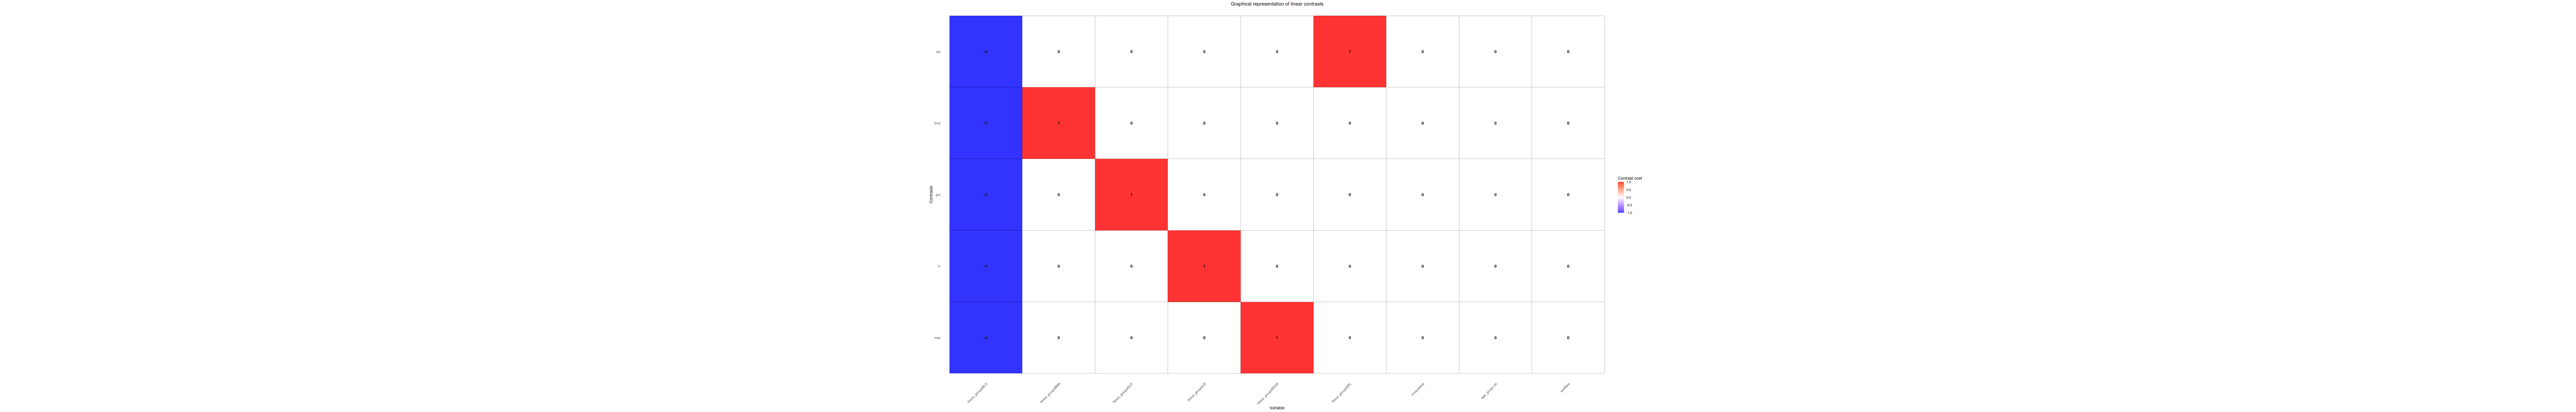

In [12]:
form <- ~ tissue_groups + cmv + age_group + sex + (1|chemistry) + (1|site) + 0

# Define contrasts
# Note that for each contrass, the weights sum to 1
L <- makeContrastsDream(form, colData(res.proc), contrasts = c(
    resp = "tissue_groupsRESP - tissue_groupsBLO",
    ln = "tissue_groupsLN - tissue_groupsBLO",
    gut = "tissue_groupsGUT - tissue_groupsBLO",
    bma = "tissue_groupsBMA - tissue_groupsBLO",
    spl = "tissue_groupsSPL - tissue_groupsBLO")
)

# Plot to visualize contrasts matrix
plotContrasts(L)

In [13]:
form <- ~ tissue_groups + cmv + age_group + sex + (1|chemistry) + (1|site) + 0

# Differential expression analysis within each assay,
# evaluated on the voom normalized data
res.dl2 <- dreamlet(
    res.proc,
    form,
    assays=c('B cell', 'CD4+ Tcell', 'CD8+ Tcell', 'Myeloid', 'NK ILC'),
    colData(res.proc),
    contrasts = c(
        resp = "tissue_groupsRESP - tissue_groupsBLO",
        ln = "tissue_groupsLN - tissue_groupsBLO",
        gut = "tissue_groupsGUT - tissue_groupsBLO",
        bma = "tissue_groupsBMA - tissue_groupsBLO",
        spl = "tissue_groupsSPL - tissue_groupsBLO"),
    computeResiduals=TRUE,
    BPPARAM=multicoreParam
)

# names of estimated coefficients
coefNames(res.dl2) 

  B cell...
19 mins

  CD4+ Tcell...
18 mins

  CD8+ Tcell...
18 mins

  Myeloid...
17 mins

  NK ILC...
17 mins


Of 56,037 models fit across all assays, 0.305% failed




[1] "resp"              "ln"                "gut"              
 [4] "bma"               "spl"               "tissue_groupsBLO" 
 [7] "tissue_groupsBMA"  "tissue_groupsGUT"  "tissue_groupsLN"  
[10] "tissue_groupsRESP" "tissue_groupsSPL"  "cmvpositive"      
[13] "age_group>40"      "sexMale"

In [14]:
plotVolcano(res.dl2, coef='resp', nGenes=100, assay='B cell')

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 84 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [17]:
for (i in c('resp', 'ln', 'gut', 'bma', 'spl')){
    table <- topTable(res.dl2, coef=i, number=Inf)
    write.csv(table, paste0("results_dreamlet/", i, "_vs_blood_random.csv"))
}

In [18]:
form <- ~ tissue_groups + cmv + age_group + sex + chemistry + site + 0

# Differential expression analysis within each assay,
# evaluated on the voom normalized data
res.dl <- dreamlet(
    res.proc,
    form,
    assays=c('B cell', 'CD4+ Tcell', 'CD8+ Tcell', 'Myeloid', 'NK ILC'),
    colData(res.proc),
    contrasts = c(
        resp = "tissue_groupsRESP - tissue_groupsBLO",
        ln = "tissue_groupsLN - tissue_groupsBLO",
        gut = "tissue_groupsGUT - tissue_groupsBLO",
        bma = "tissue_groupsBMA - tissue_groupsBLO",
        spl = "tissue_groupsSPL - tissue_groupsBLO"),
    computeResiduals=TRUE,
    BPPARAM=multicoreParam
)

# names of estimated coefficients
coefNames(res.dl) 

  B cell...
14 secs

  CD4+ Tcell...
16 secs

  CD8+ Tcell...
14 secs

  Myeloid...
16 secs

  NK ILC...
14 secs



[1] "resp"              "ln"                "gut"              
 [4] "bma"               "spl"               "tissue_groupsBLO" 
 [7] "tissue_groupsBMA"  "tissue_groupsGUT"  "tissue_groupsLN"  
[10] "tissue_groupsRESP" "tissue_groupsSPL"  "cmvpositive"      
[13] "age_group>40"      "sexMale"           "chemistry5'v2"    
[16] "siteUK"

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 81 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


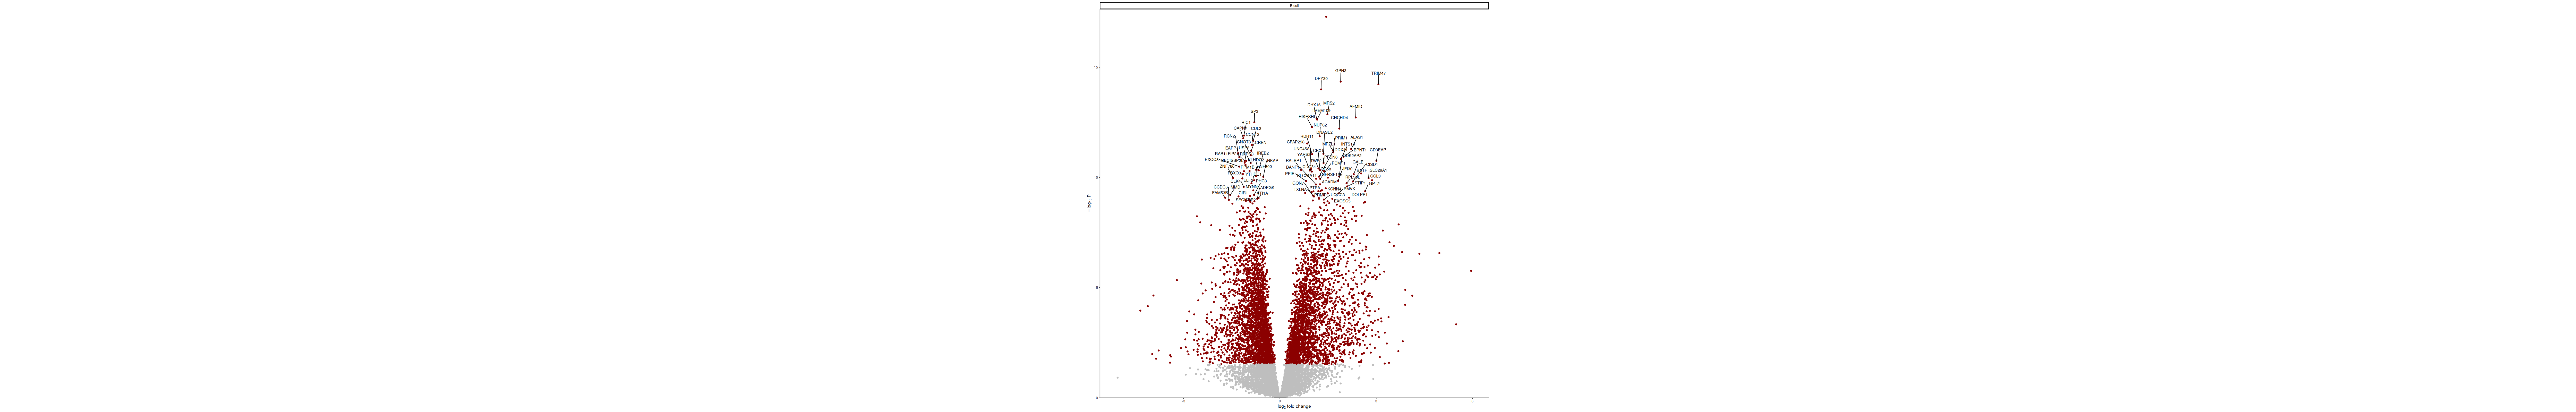

In [19]:
plotVolcano(res.dl, coef='resp', nGenes=100, assay='B cell')

In [20]:
for (i in c('resp', 'ln', 'gut', 'bma', 'spl')){
    table <- topTable(res.dl, coef=i, number=Inf)
    write.csv(table, paste0("results_dreamlet/", i, "_vs_blood.csv"))
}

# DE test aging

In [21]:
res.proc <- readRDS(pb, file='pseudobulk_immuneaging_preprocessed_redo.rds')

In [26]:
colData(res.proc)$age_group <- gsub(">", "over", colData(res.proc)$age_group)
colData(res.proc)$age_group <- gsub("<", "under", colData(res.proc)$age_group)
colData(res.proc)$age_group <- as.factor(colData(res.proc)$age_group)
colData(res.proc)$age_group <- relevel(colData(res.proc)$age_group, ref = "under40")

In [27]:
colData(res.proc)$tissue_age <- as.factor(paste(colData(res.proc)$tissue_groups, colData(res.proc)$age_group, sep = "_"))

In [32]:
colData(res.proc)$tissue_age
colData(res.proc)$tissue_age <- relevel(colData(res.proc)$tissue_age, ref = "BLO_under40")

[1] GUT_over40   GUT_over40   LN_over40    LN_over40    SPL_over40  
  [6] BLO_under40  BMA_under40  LN_under40   RESP_under40 SPL_under40 
 [11] BMA_under40  LN_under40   RESP_under40 LN_under40   SPL_under40 
 [16] BLO_over40   BMA_over40   LN_over40    LN_over40    SPL_over40  
 [21] BLO_over40   BMA_over40   GUT_over40   GUT_over40   LN_over40   
 [26] RESP_over40  LN_over40    SPL_over40   BMA_over40   GUT_over40  
 [31] GUT_over40   LN_over40    RESP_over40  LN_over40    SPL_over40  
 [36] BMA_over40   GUT_over40   LN_over40    LN_over40    SPL_over40  
 [41] BMA_over40   GUT_over40   LN_over40    RESP_over40  LN_over40   
 [46] SPL_over40   BLO_under40  BMA_under40  GUT_under40  GUT_under40 
 [51] LN_under40   SPL_under40  BLO_under40  BMA_under40  GUT_under40 
 [56] GUT_under40  LN_under40   LN_under40   SPL_under40  BLO_under40 
 [61] BMA_under40  GUT_under40  GUT_under40  LN_under40   RESP_under40
 [66] LN_under40   SPL_under40  BLO_over40   BMA_over40   GUT_over40  
 [71] GUT_over40   LN_over40    RESP_over40  LN_over40    SPL_over40  
 [76] BLO_over40   BMA_over40   GUT_over40   GUT_over40   LN_over40   
 [81] RESP_over40  SPL_over40   RESP_over40  BLO_over40   BMA_over40  
 [86] GUT_over40   GUT_over40   LN_over40    RESP_over40  SPL_over40  
 [91] RESP_under40 BLO_under40  LN_under40   GUT_under40  GUT_under40 
 [96] LN_under40   RESP_under40 LN_under40   RESP_under40 BLO_under40 
[101] BMA_under40  GUT_under40  GUT_under40  LN_under40   RESP_under40
[106] LN_under40   RESP_under40 BLO_under40  BMA_under40  LN_under40  
[111] GUT_under40  GUT_under40  LN_under40   RESP_under40 LN_under40  
[116] SPL_under40  RESP_over40  BLO_over40   LN_over40    GUT_over40  
[121] GUT_over40   LN_over40    RESP_over40  LN_over40    SPL_over40  
[126] RESP_over40  BLO_over40   BMA_over40   LN_over40    GUT_over40  
[131] GUT_over40   LN_over40    RESP_over40  LN_over40    SPL_over40  
[136] BLO_over40   BMA_over40   LN_over40    GUT_over40   GUT_over40  
[141] LN_over40    RESP_over40  LN_over40    SPL_over40   RESP_under40
[146] BLO_under40  BMA_under40  LN_under40   GUT_under40  GUT_under40 
[151] LN_under40   RESP_under40 LN_under40   SPL_under40  RESP_under40
[156] BLO_under40  LN_under40   GUT_under40  GUT_under40  LN_under40  
[161] RESP_under40 LN_under40   SPL_under40  RESP_over40  BLO_over40  
[166] BMA_over40   LN_over40    GUT_over40   GUT_over40   LN_over40   
[171] RESP_over40  LN_over40    SPL_over40   RESP_over40  BLO_over40  
[176] BMA_over40   LN_over40    GUT_over40   GUT_over40   LN_over40   
[181] RESP_over40  LN_over40    SPL_over40  
12 Levels: BLO_over40 BLO_under40 BMA_over40 BMA_under40 ... SPL_under40

In [34]:
form <- ~ tissue_age + cmv + sex + (1|chemistry) + (1|site) + 0

# Define contrasts
# Note that for each contrass, the weights sum to 1
L <- makeContrastsDream(form, colData(res.proc), contrasts = c(
    gut_age = "tissue_ageGUT_over40 - tissue_ageGUT_under40",
    spl_age = "tissue_ageSPL_over40 - tissue_ageSPL_under40",
    ln_age = "tissue_ageLN_over40 - tissue_ageLN_under40",
    blo_age = "tissue_ageBLO_over40 - tissue_ageBLO_under40",
    resp_age = "tissue_ageRESP_over40 - tissue_ageRESP_under40",
    bma_age = "tissue_ageBMA_over40 - tissue_ageBMA_under40")
)

plotContrasts(L)

In [35]:
form <- ~ tissue_age + cmv + sex + (1|chemistry) + (1|site) + 0

# Differential expression analysis within each assay,
# evaluated on the voom normalized data
res.dl2 <- dreamlet(
    res.proc,
    form,
    assays=c('B cell', 'CD4+ Tcell', 'CD8+ Tcell', 'Myeloid', 'NK ILC'),
    colData(res.proc),
    contrasts = c(
        gut_age = "tissue_ageGUT_over40 - tissue_ageGUT_under40",
        spl_age = "tissue_ageSPL_over40 - tissue_ageSPL_under40",
        ln_age = "tissue_ageLN_over40 - tissue_ageLN_under40",
        blo_age = "tissue_ageBLO_over40 - tissue_ageBLO_under40",
        resp_age = "tissue_ageRESP_over40 - tissue_ageRESP_under40",
        bma_age = "tissue_ageBMA_over40 - tissue_ageBMA_under40"),
    computeResiduals=TRUE,
    BPPARAM=multicoreParam
)

# names of estimated coefficients
coefNames(res.dl2) 

  B cell...
18 mins

  CD4+ Tcell...
18 mins

  CD8+ Tcell...
18 mins

  Myeloid...
18 mins

  NK ILC...
17 mins


Of 56,037 models fit across all assays, 0.359% failed




[1] "gut_age"                "spl_age"                "ln_age"                
 [4] "blo_age"                "resp_age"               "bma_age"               
 [7] "tissue_ageBLO_under40"  "tissue_ageBLO_over40"   "tissue_ageBMA_over40"  
[10] "tissue_ageBMA_under40"  "tissue_ageGUT_over40"   "tissue_ageGUT_under40" 
[13] "tissue_ageLN_over40"    "tissue_ageLN_under40"   "tissue_ageRESP_over40" 
[16] "tissue_ageRESP_under40" "tissue_ageSPL_over40"   "tissue_ageSPL_under40" 
[19] "cmvpositive"            "sexMale"

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 74 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


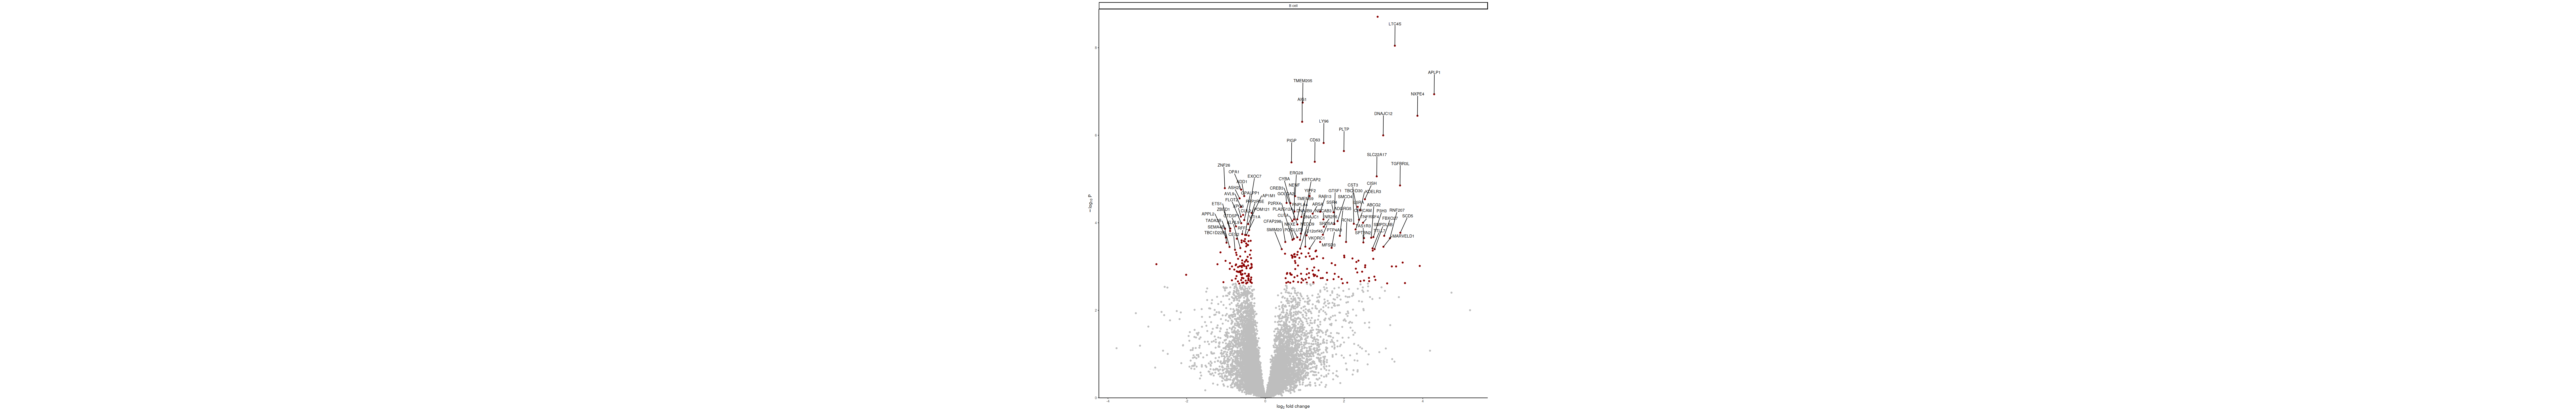

In [48]:
plotVolcano(res.dl2, coef='bma_age', nGenes=100, assay='B cell')

In [39]:
for (i in c('gut_age', 'spl_age', 'ln_age', 'blo_age', 'resp_age', 'bma_age')){
    table <- topTable(res.dl2, coef=i, number=Inf)
    write.csv(table, paste0("results_dreamlet/aging_", i, "_vs_blood_random.csv"))
}

In [42]:
form <- ~ tissue_age + cmv + sex + chemistry + site + 0

# Differential expression analysis within each assay,
# evaluated on the voom normalized data
res.dl <- dreamlet(
    res.proc,
    form,
    assays=c('B cell', 'CD4+ Tcell', 'CD8+ Tcell', 'Myeloid', 'NK ILC'),
    colData(res.proc),
    contrasts = c(
        gut_age = "tissue_ageGUT_over40 - tissue_ageGUT_under40",
        spl_age = "tissue_ageSPL_over40 - tissue_ageSPL_under40",
        ln_age = "tissue_ageLN_over40 - tissue_ageLN_under40",
        blo_age = "tissue_ageBLO_over40 - tissue_ageBLO_under40",
        resp_age = "tissue_ageRESP_over40 - tissue_ageRESP_under40",
        bma_age = "tissue_ageBMA_over40 - tissue_ageBMA_under40"),
    computeResiduals=TRUE,
    BPPARAM=multicoreParam
)

# names of estimated coefficients
coefNames(res.dl) 

  B cell...
1.1 mins

  CD4+ Tcell...
34 secs

  CD8+ Tcell...
38 secs

  Myeloid...
33 secs

  NK ILC...
2.3 mins



[1] "gut_age"                "spl_age"                "ln_age"                
 [4] "blo_age"                "resp_age"               "bma_age"               
 [7] "tissue_ageBLO_under40"  "tissue_ageBLO_over40"   "tissue_ageBMA_over40"  
[10] "tissue_ageBMA_under40"  "tissue_ageGUT_over40"   "tissue_ageGUT_under40" 
[13] "tissue_ageLN_over40"    "tissue_ageLN_under40"   "tissue_ageRESP_over40" 
[16] "tissue_ageRESP_under40" "tissue_ageSPL_over40"   "tissue_ageSPL_under40" 
[19] "cmvpositive"            "sexMale"                "chemistry5'v2"         
[22] "siteUK"

In [44]:
plotVolcano(res.dl, coef='resp_age', nGenes=100, assay='B cell')

Warning message:
“Removed 11 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [46]:
for (i in c('gut_age', 'spl_age', 'bma_age', 'ln_age', 'blo_age', 'resp_age')){
    table <- topTable(res.dl, coef=i, number=Inf)
    write.csv(table, paste0("results_dreamlet/aging_", i, "_vs_blood.csv"))
}

In [ ]:
# Evaluate the specificity of each gene for each cluster
df_cts = cellTypeSpecificity( pb )

In [ ]:
for (x in assayNames(pb)) {
  # run comparison
    print(x)
    ct.pairs = c(x, "rest")
    # use method = 'fixed' here since it is faster
    fit = dreamletCompareClusters(pb, ct.pairs, method="random", min.cells=50, formula= ~ tissue + age + sex + (1|chemistry) + (1|site) + 0)
    diff_ct = topTable(fit, coef='compare', number=1000, p.value=0.05, sort.by='logFC', resort.by='logFC')
    # Get genes upregulated in monocytes
    idx = with(diff_ct, which(logFC > 0))[1:5]
    plotHeatmap(df_cts, genes = rownames(diff_ct)[idx])
    idx = with(diff_ct, which(logFC > 0))
    write.csv(diff_ct[idx,], sprintf("pseudobulk_export/%s.csv", x), row.names=TRUE)
}

In [ ]:
help(dreamlet)